In [1]:
import math
def vert_coord():
    
    radius = 30
    
    scaler = radius/(3/8)**0.5/2
    v0 = [1, 0, -1/2**0.5]
    v1 = [-1, 0, -1/2**0.5]
    v2 = [0, 1, 1/2**0.5]
    v3 = [0, -1, 1/2**0.5]
    VertCoord = [v0, v1, v2, v3]
    VertCoord_ = []
    for i in VertCoord:
        temp_list = []
        for j in i:
            temp = j*scaler
            temp_list.append(temp)
        VertCoord_.append(temp_list)
    return VertCoord_

if __name__ == '__main__':
    print(vert_coord())

[[24.494897427831784, 0.0, -17.320508075688775], [-24.494897427831784, 0.0, -17.320508075688775], [0.0, 24.494897427831784, 17.320508075688775], [0.0, -24.494897427831784, 17.320508075688775]]


In [3]:
def distance(a, b):
    # a seperated function for calculating the distance between two coordinates
    n = 15
    return round(((a[0] - b[0])**2 + (a[1] - b[1])**2 + (a[2] - b[2])**2)**0.5, n)

if __name__ == '__main__':
    coord = vert_coord()
    print('radius = ', distance([0, 0, 0], coord[0]))
    print('edge length = ', distance(coord[0], coord[1]))

radius =  30.000000000000004
edge length =  48.98979485566357


In [4]:
def mid_pt(a, b):
    # this is a seperate function for calculating mid point of two coords
    n = 15
    return [round((a[0]+b[0])/2, n), round((a[1]+b[1])/2, n), round((a[2]+b[2])/2, n)]

if __name__ == '__main__':
    print(mid_pt([1, 2, 3], [4, 5, 6]))

[2.5, 3.5, 4.5]


In [5]:
from numpy import *

def COM_leg(COM, a, b, c):
    lega = mid_pt(COM, a)
    legb = mid_pt(COM, b)
    legc = mid_pt(COM, c)
    return [around(COM, 10), around(lega, 10), around(legb, 10), around(legc, 10)]

if __name__ == '__main__':
    coord = vert_coord()
    print(COM_leg(coord[0], coord[1], coord[2], coord[3]))

[array([ 24.49489743,   0.        , -17.32050808]), array([  0.        ,   0.        , -17.32050808]), array([12.24744871, 12.24744871,  0.        ]), array([ 12.24744871, -12.24744871,   0.        ])]


In [7]:
def COM_leg_gen():
    coord = vert_coord()
    COM_leg_list = []
    COM_leg_list.append(COM_leg(coord[0], coord[1], coord[2], coord[3]))
    COM_leg_list.append(COM_leg(coord[1], coord[2], coord[3], coord[0]))
    COM_leg_list.append(COM_leg(coord[2], coord[3], coord[0], coord[1]))
    COM_leg_list.append(COM_leg(coord[3], coord[0], coord[1], coord[2]))
    
    return COM_leg_list

def COM_leg_valid():
    COM_leg_list = COM_leg_gen()
    leg_pool = []
    count = 0
    for i in COM_leg_list:
        for j in range(len(i)):
            if j != 0:
                if list(i[j]) not in leg_pool:
                    count += 1
                    leg_pool.append(list(i[j]))
    print('Number of leg = ', count, '(should be 6)')

if __name__ == '__main__':
    COM_leg_valid()

Number of leg =  6 (should be 6)


In [12]:
def leg_reduce(COM, leg, sigma):   
    red_len = sigma/2
    ratio = 1 - red_len/distance(COM, leg)
    leg_red = []
    for i in range(0, 3):
        leg_red.append(round((leg[i] - COM[i])*ratio + COM[i], 8))
    return leg_red
                
def leg_reduce_valid(a, b, c, d, sigma):
    # validate the reduced length of legs is correct
    n = 8
    result_1 = leg_reduce(a, b, sigma)
    result_2 = leg_reduce(c, d, sigma)
    dis = distance(result_1, result_2)
    print('Actual distance: ', round(dis, 8))
    print('Assigned sigma: ', sigma)
    if round(dis, n) == sigma:
        print('Result match!\n')
    else:
        print('Result does not match!\n')

if __name__ == '__main__':
    coord = COM_leg_gen()
    leg_reduce_valid(coord[0][0], coord[0][1], coord[1][0], coord[1][3], 1)
    leg_reduce_valid(coord[2][0], coord[2][1], coord[3][0], coord[3][3], 2)
    leg_reduce_valid(coord[0][0], coord[0][3], coord[3][0], coord[3][1], 5)

Actual distance:  1.0
Assigned sigma:  1
Result match!

Actual distance:  2.0
Assigned sigma:  2
Result match!

Actual distance:  5.0
Assigned sigma:  5
Result match!



In [14]:
def leg_reduce_coor_gen():
    # Generating all the coords of COM and legs when sigma exists
    sigma = 1
    COM_leg_list = COM_leg_gen()
    COM_leg_red_list = []
    for elements in COM_leg_list:
        temp_list = []
        temp_list.append(elements[0])
        i = 1
        while i <= 3:
            temp_list.append(leg_reduce(elements[0], elements[i], sigma))
            i += 1
        COM_leg_red_list.append(temp_list)
    print('Number of elements in list: ', len(COM_leg_red_list), '(should be 4)\n')
    return COM_leg_red_list

if __name__ == '__main__':
    result = leg_reduce_coor_gen()
    for i in result:
        print(i, '\n')

Number of elements in list:  4 (should be 4)

[array([ 24.49489743,   0.        , -17.32050808]), [0.5, 0.0, -17.32050808], [12.49744871, 11.99744871, -0.35355339], [12.49744871, -11.99744871, -0.35355339]] 

[array([-24.49489743,   0.        , -17.32050808]), [-12.49744871, 11.99744871, -0.35355339], [-12.49744871, -11.99744871, -0.35355339], [-0.5, 0.0, -17.32050808]] 

[array([ 0.        , 24.49489743, 17.32050808]), [0.0, 0.5, 17.32050808], [11.99744871, 12.49744871, 0.35355339], [-11.99744871, 12.49744871, 0.35355339]] 

[array([  0.        , -24.49489743,  17.32050808]), [11.99744871, -12.49744871, 0.35355339], [-11.99744871, -12.49744871, 0.35355339], [0.0, -0.5, 17.32050808]] 



Number of elements in list:  4 (should be 4)



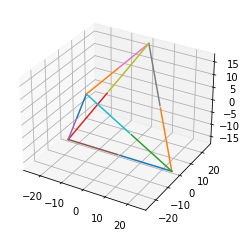

In [15]:
from mpl_toolkits.mplot3d import axes3d  
import matplotlib.pyplot as plt  
 
# visualize the model
def sig_vis(list, ax):
    for i in range(1, 4):
        figure = ax.plot([list[0][0], list[i][0]], [list[0][1], list[i][1]], [list[0][2], list[i][2]])

def vis(lst):
    fig = plt.figure(1)  
    ax = fig.gca(projection='3d')
    for element in lst:
        sig_vis(element, ax) 
    plt.show()

if __name__ == '__main__':
    lst = leg_reduce_coor_gen()
    vis(lst)

In [16]:
import numpy as np

# calculating the 5 angles according to the coords of legs and COM
# see SI of the NERDSS paper II part for detail
def angle_cal(COM1, leg1, COM2, leg2):
    n = 8
    c1 = np.array(COM1)
    p1 = np.array(leg1)
    c2 = np.array(COM2)
    p2 = np.array(leg2)
    v1 = p1 - c1
    v2 = p2 - c2
    sig1 = p1 - p2
    sig2 = -sig1
    theta1 = round(math.acos(np.dot(v1, sig1)/(np.linalg.norm(v1)*np.linalg.norm(sig1))), n)
    theta2 = round(math.acos(np.dot(v2, sig2)/(np.linalg.norm(v2)*np.linalg.norm(sig2))), n)
    print('-----------------------')
    print('theta1 = ', round(theta1/math.pi, n), 'pi')
    print('theta2 = ', round(theta2/math.pi, n), 'pi')

    t1 = np.cross(v1, sig1)
    t2 = np.cross(v1, c1) # n1 = c1 here
    t1_hat = t1/np.linalg.norm(t1)
    t2_hat = t2/np.linalg.norm(t2)
    phi1 = round(math.acos(np.around(np.dot(t1_hat, t2_hat), n)), n)
    t3 = np.cross(v2, sig2)
    t4 = np.cross(v2, c2) # n2 = c2 here
    t3_hat = t3/np.linalg.norm(t3)
    t4_hat = t4/np.linalg.norm(t4)
    phi2 = round(math.acos(np.around(np.dot(t3_hat, t4_hat), n)), n)
    print('phi1 = ', round(phi1/math.pi, n), 'pi')
    print('phi2 = ', round(phi2/math.pi, n), 'pi')

    t1_ = np.cross(sig1, v1)
    t2_ = np.cross(sig1, v2)
    t1__hat = t1/np.linalg.norm(t1)
    t2__hat = t2/np.linalg.norm(t2)
    omega = round(math.acos(np.around(np.dot(t1__hat, t2__hat), n)), n)
    print('omega = ', round(omega/math.pi, n), 'pi')
    
    print('COM1 = ', COM1)
    print('COM2 = ', COM2)
    print('leg1 = ', leg1)
    print('leg2 = ', leg2)
    print('c1 = ', c1)
    print('c2 = ', c2)
    
    return [theta1, theta2, phi1, phi2, omega]

if __name__ == '__main__':
    coord = leg_reduce_coor_gen()
    print(angle_cal(coord[0][0], coord[0][1], coord[1][0], coord[1][3]))
#     print(angle_cal(coord[2][0], coord[2][2], coord[14][0], coord[14][1]))
#     print(angle_cal(coord[7][0], coord[7][1], coord[5][0], coord[5][1]))

Number of elements in list:  4 (should be 4)

-----------------------
theta1 =  1.0 pi
theta2 =  1.0 pi
phi1 =  0.0 pi
phi2 =  0.0 pi
omega =  0.0 pi
COM1 =  [ 24.49489743   0.         -17.32050808]
COM2 =  [-24.49489743   0.         -17.32050808]
leg1 =  [0.5, 0.0, -17.32050808]
leg2 =  [-0.5, 0.0, -17.32050808]
c1 =  [ 24.49489743   0.         -17.32050808]
c2 =  [-24.49489743   0.         -17.32050808]
[3.14159265, 3.14159265, 0.0, 0.0, 0.0]


In [17]:
# calculate coordinates of normalized COM and legs
def input_coord():

    coor = leg_reduce_coor_gen()
    coor_ = np.array(coor[0])
    COM = around(coor_[0] - coor_[0], 12)
    lg1 = around(coor_[1] - coor_[0], 12)
    lg2 = around(coor_[2] - coor_[0], 12)
    lg3 = around(coor_[3] - coor_[0], 12)
    n = around(coor_[0]/np.linalg.norm(coor_[0]), 12)
    
    print('COM = ', COM)
    print('lg1 = ', lg1)
    print('lg2 = ', lg2)
    print('lg3 = ', lg3)
    print('n   = ', n)
    
    return COM, lg1, lg2, lg3, n

if __name__ == '__main__':
    input_coord()

Number of elements in list:  4 (should be 4)

COM =  [0. 0. 0.]
lg1 =  [-2.39948974e+01  0.00000000e+00 -4.30000000e-09]
lg2 =  [-11.99744872  11.99744871  16.96695469]
lg3 =  [-11.99744872 -11.99744871  16.96695469]
n   =  [ 0.81649658  0.         -0.57735027]


Number of elements in list:  4 (should be 4)

COM =  [0. 0. 0.]
lg1 =  [-2.39948974e+01  0.00000000e+00 -4.30000000e-09]
lg2 =  [-11.99744872  11.99744871  16.96695469]
lg3 =  [-11.99744872 -11.99744871  16.96695469]
n   =  [ 0.81649658  0.         -0.57735027]


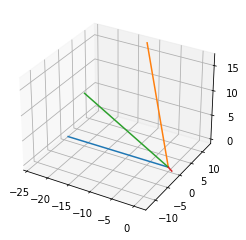

In [18]:
def sig_vis2(list, ax, n):
    for i in range(1, 4):
        figure = ax.plot([list[0][0], list[i][0]], [list[0][1], list[i][1]], [list[0][2], list[i][2]])
    figure = ax.plot([n[0], list[0][0]], [n[1], list[0][1]], [n[2], list[0][2]])
        
def vis2(lst, n):
    fig = plt.figure(1)  
    ax = fig.gca(projection='3d')
    for element in lst:
        sig_vis2(element, ax, n) 
    plt.show()

if __name__ == '__main__':
    COM, lg1, lg2, lg3, n = input_coord()
    vis2([[COM, lg1, lg2, lg3]], n)

In [19]:
def norm_input():
    COM, lg1, lg2, lg3, n = input_coord()
    length = distance(lg1, lg2)

    dis1 = ((-length/2)**2+(-((length/2)*(3**0.5))/3)**2)**0.5
    dis2 = distance(COM, lg1)

    height = (dis2**2-dis1**2)**0.5

    lg1_ = np.array([-length/2, -((length/2)*(3**0.5))/3, -height])
    lg2_ = np.array([length/2, -((length/2)*(3**0.5))/3, -height])
    lg3_ = np.array([0, ((length/2)*(3**0.5))/3*2, -height])
    COM_ = np.array([0, 0, 0])
    n_ = np.array([0, 0, 1])

    print('---------------------------------------------------')
    print('Final input coord:')

    print('COM = ', COM_)
    print('lg1 = ', lg1_)
    print('lg2 = ', lg2_)
    print('lg3 = ', lg3_)
    print('n = ', n_)

    return COM_, lg1_, lg2_, lg3_, n_

if __name__ == '__main__':
    norm_input()

Number of elements in list:  4 (should be 4)

COM =  [0. 0. 0.]
lg1 =  [-2.39948974e+01  0.00000000e+00 -4.30000000e-09]
lg2 =  [-11.99744872  11.99744871  16.96695469]
lg3 =  [-11.99744872 -11.99744871  16.96695469]
n   =  [ 0.81649658  0.         -0.57735027]
---------------------------------------------------
Final input coord:
COM =  [0 0 0]
lg1 =  [-11.99744871  -6.92673024 -19.59175171]
lg2 =  [ 11.99744871  -6.92673024 -19.59175171]
lg3 =  [  0.          13.85346049 -19.59175171]
n =  [0 0 1]


Number of elements in list:  4 (should be 4)

COM =  [0. 0. 0.]
lg1 =  [-2.39948974e+01  0.00000000e+00 -4.30000000e-09]
lg2 =  [-11.99744872  11.99744871  16.96695469]
lg3 =  [-11.99744872 -11.99744871  16.96695469]
n   =  [ 0.81649658  0.         -0.57735027]
---------------------------------------------------
Final input coord:
COM =  [0 0 0]
lg1 =  [-11.99744871  -6.92673024 -19.59175171]
lg2 =  [ 11.99744871  -6.92673024 -19.59175171]
lg3 =  [  0.          13.85346049 -19.59175171]
n =  [0 0 1]


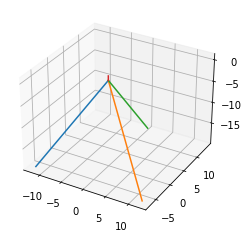

In [20]:
if __name__ == '__main__':
    COM, lg1, lg2, lg3, n = norm_input()
    vis2([[COM, lg1, lg2, lg3]], n)